# Lab 3 Data Representation II --- Text
The learning objectives of this lab are for you to be able to
<ol>
    <li> Split a piece of text into segments using .split in Python. </li>
    <li> Count the frequency a name occurs in a string using char.count in numpy. </li>
    <li> Visualize the change of word frequency in different chapters of a novel. </li>
    <li> Use CountVectorizer to transform tweets into their word frequency representation. </li>
    <li> Extract the words and the word frequency count from the word frequency matrix (at least when the number of tweets is small) </li>
    </ol>

In [3]:
!pip install datascience

     |████████████████████████████████| 51kB 1.4MB/s eta 0:00:011
     |████████████████████████████████| 92kB 3.9MB/s eta 0:00:01
     |████████████████████████████████| 13.0MB 2.2MB/s eta 0:00:01     |████████████████████████████████| 13.0MB 16kB/s 
     |████████████████████████████████| 215kB 6.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/1d/e7/fd8b501e7a6dfe492a433deb7b9d833d39ca74916fa8bc63dd1a4947a671/Jinja2-2.10.1-py2.py3-none-any.whl
     |████████████████████████████████| 92kB 9.6MB/s  eta 0:00:01
  Created wheel for datascience: filename=datascience-0.15.0-cp35-none-any.whl size=43984 sha256=3d530061a8af5a1da2d660b2eaab187a5b3dd7b2d4f96b77ebc4c06c16a80c20
  Stored in directory: /home/nbuser/.cache/pip/wheels/05/85/84/56b3516177a390f738af02474620e9fcc0dc87c373f552337b
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=19851 sha256=bfce5d398f21be1e2bbde5370d938507ec2bb33a4b48ab7473e600348c10bf4f
  Stored in directory: /home/

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import datascience

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [5]:
from datascience import *
import numpy as np
import matplotlib

In [6]:
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [7]:
from urllib.request import urlopen
import re
def read_url(url):
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

In [8]:
# Read The Adventures of Huckleberry Finn
huck_finn_url = 'http://introcs.cs.princeton.edu/python/33design/huckfinn.txt'
huck_finn_text = read_url(huck_finn_url)
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[:44]

### Splitting text into smaller segments
The entire text of the novel is stored in the variable "huck_finn_text".

In [19]:
print(huck_finn_text[:500])

The Project Gutenberg EBook of The Adventures of Huckleberry Finn, Complete by Mark Twain (Samuel Clemens) This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Huckleberry Finn, Complete Author: Mark Twain (Samuel Clemens) Release Date: June 29, 2004 [EBook #76] Language: English


### Split 
The .split() method of text takes an argument, which is the string used to divide the input text into segments.  The example below first uses 'CHAPTER ' to divide the entire novel into segments based on the chapters of the book, because each chapter starts with 'CHAPTER 1', 'CHAPTER 2', ...

In [20]:
huck_finn_chapters = huck_finn_text.split('CHAPTER ')[1:]
print(huck_finn_chapters[0][:500])

I. YOU don't know about me without you have read a book by the name of The Adventures of Tom Sawyer; but that ain't no matter. That book was made by Mr. Mark Twain, and he told the truth, mainly. There was things which he stretched, but mainly he told the truth. That is nothing. I never seen anybody but lied one time or another, without it was Aunt Polly, or the widow, or maybe Mary. Aunt Polly--Tom's Aunt Polly, she is--and Mary, and the Widow Douglas is all told about in that book, which is mo


In [21]:
ChapTable=Table().with_column('Chapters', huck_finn_chapters)
ChapTable.show(10)

Chapters
I. YOU don't know about me without you have read a book ...
II. WE went tiptoeing along a path amongst the trees bac ...
"III. WELL, I got a good going-over in the morning from o ..."
"IV. WELL, three or four months run along, and it was wel ..."
V. I HAD shut the door to. Then I turned around and ther ...
"VI. WELL, pretty soon the old man was up and around agai ..."
"VII. ""GIT up! What you 'bout?"" I opened my eyes and look ..."
VIII. THE sun was up so high when I waked that I judged ...
IX. I WANTED to go and look at a place right about the m ...
X. AFTER breakfast I wanted to talk about the dead man a ...


### Split into words
We can also use split to break a sentence into words, by use space ' ' as the parameter of .split, because words of a sentence are separated by space.  Below is an example.

In [29]:
sentence='Penn State football is rising on the AP pool.'
print(sentence)

Penn State football is rising on the AP pool.


In [30]:
words=sentence.split(' ')
print(words)

['Penn', 'State', 'football', 'is', 'rising', 'on', 'the', 'AP', 'pool.']


### Exercise 1
Create a sentence of your own, then use split(' ') to turn it into a list of words.

In [31]:
Mysentence = ' Pitt guys sit when they pee.'
print(Mysentence)

 Pitt guys sit when they pee.


In [32]:
Mywords = Mysentence.split(' ')
print(Mywords)

['', 'Pitt', 'guys', 'sit', 'when', 'they', 'pee.']


### Extracting a Specific Word from a Text
There are often a need to extract a specific word from a large piece of text.  One way to do it is to use numpy Python module char.count.  For example, the following code count, for each chapter, how many time 'Jim" appears.

In [33]:
np.char.count(huck_finn_chapters, 'Jim')

array([ 0, 16,  0,  8,  0,  0,  0, 22, 11, 19,  4, 20,  9,  6, 16, 28,  0,
       10, 13, 18,  1,  0,  9,  5,  0,  0,  0,  1,  3,  5, 17,  0,  4, 17,
       16, 23,  4, 26, 10, 12,  0, 11,  6])

#### As we can see, the result is a one-dimensional array.
The entries in the array show that 'Jim' occurs 0 time in Chapter 1, 16 time in Chapter 2, and so on.

### Exercise 2
Find out how many time 'Tom' appears in Chapter 1, 5 and 10.

In [34]:
np.char.count(huck_finn_chapters, 'Tom' )

array([ 6, 24,  5,  0,  0,  0,  2,  2,  0,  0,  2,  3,  1,  0,  0,  0,  3,
        5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  3, 19, 15,
       14, 18,  9, 32, 11, 11,  7, 29,  6])

### Put Your Answer in the next line of this text cell:
My Answer for Exercise 2: 6, 0, and 0 

### Comparing word frequency of different characters
We can collect the count of different character's name into a table: rows are chapters, columns are count for different character's name in the novel.

In [35]:
counts = Table().with_columns([
        'Jim', np.char.count(huck_finn_chapters, 'Jim'),
        'Tom', np.char.count(huck_finn_chapters, 'Tom'),
        'Huck', np.char.count(huck_finn_chapters, 'Huck')
    ])

In [36]:
counts.show(10)

Jim,Tom,Huck
0,6,3
16,24,2
0,5,2
8,0,1
0,0,0
0,0,2
0,2,0
22,2,5
11,0,1
19,0,0


### Visualize and Comparison
Can we vse visualization to compare the change of number of occurance of these three characters over different chapters in the novel?  
The answer is YES.  We can do this using plot.

Text(0.5, 1.0, 'Number of Times Each Name Appers in a Chapter')

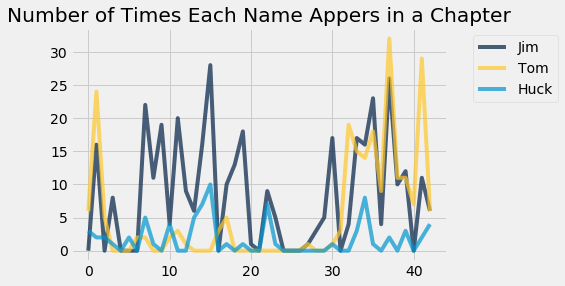

In [37]:
counts.plot()
plots.title('Number of Times Each Name Appers in a Chapter')

### We can also compare the cumulative total appearance of a name from Chapter 1. 
This can be done using .cumsum() method of numpy.

In [38]:
counts.cumsum()

Jim,Tom,Huck
0,6,3
16,30,5
16,35,7
24,35,8
24,35,8
24,35,10
24,37,10
46,39,15
57,39,16
76,39,16


In [39]:
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 44, 1))
cum_counts.show(10)

Jim,Tom,Huck,Chapter
0,6,3,1
16,30,5,2
16,35,7,3
24,35,8,4
24,35,8,5
24,35,10,6
24,37,10,7
46,39,15,8
57,39,16,9
76,39,16,10


Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

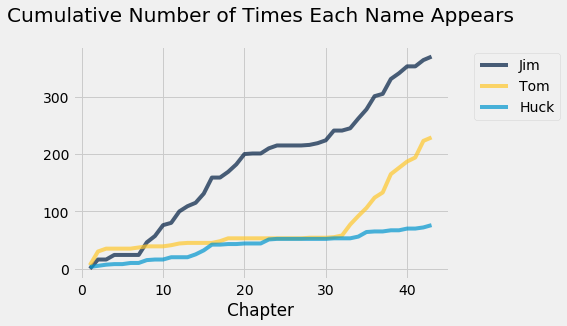

In [40]:
cum_counts.plot(column_for_xticks=3)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

In [12]:
# Read Little Women
little_women_url = 'https://raw.githubusercontent.com/ehmatthes/pcc_prep/master/chapter_10/little_women.txt'
little_women_text = read_url(little_women_url)

### Exercise 3 Separate Text Using Split
In this exercise, separate the novel "Little Woman" into multiple segments based on its chapters.
#### Hint: Each chapter starts with 'CHAPTER n' where n is the number of the chapter.

In [13]:
little_women_chapters = little_women_text.split('CHAPTER ')[1:]
print(little_women_chapters[0][:500])

ONE PLAYING PILGRIMS "Christmas won't be Christmas without any presents," grumbled Jo, lying on the rug. "It's so dreadful to be poor!" sighed Meg, looking down at her old dress. "I don't think it's fair for some girls to have plenty of pretty things, and other girls nothing at all," added little Amy, with an injured sniff. "We've got Father and Mother, and each other," said Beth contentedly from her corner. The four young faces on which the firelight shone brightened at the cheerful words, but 


#### You can then create a table with one column (column heading is 'Chapters'

In [43]:
# A glance of the chapters
Table().with_column('Chapters', little_women_chapters)

Chapters
"ONE PLAYING PILGRIMS ""Christmas won't be Christmas witho ..."
TWO A MERRY CHRISTMAS Jo was the first to wake in the gr ...
"THREE THE LAURENCE BOY ""Jo! Jo! Where are you?"" cried Me ..."
"FOUR BURDENS ""Oh, dear, how hard it does seem to take up ..."
"FIVE BEING NEIGHBORLY ""What in the world are you going t ..."
SIX BETH FINDS THE PALACE BEAUTIFUL The big house did pr ...
"SEVEN AMY'S VALLEY OF HUMILIATION ""That boy is a perfect ..."
"EIGHT JO MEETS APOLLYON ""Girls, where are you going?"" as ..."
"NINE MEG GOES TO VANITY FAIR ""I do think it was the most ..."
"TEN THE P.C. AND P.O. As spring came on, a new set of am ..."


In [44]:
# Counts of names in the chapters of Little Women
counts = Table().with_columns([
        'Amy', np.char.count(little_women_chapters, 'Amy'),
        'Beth', np.char.count(little_women_chapters, 'Beth'),
        'Jo', np.char.count(little_women_chapters, 'Jo'),
        'Meg', np.char.count(little_women_chapters, 'Meg'),
        'Laurie', np.char.count(little_women_chapters, 'Laurie'),
    ])

Text(0.5, 1.08, 'Cumulative Number of Times Each Name Appears')

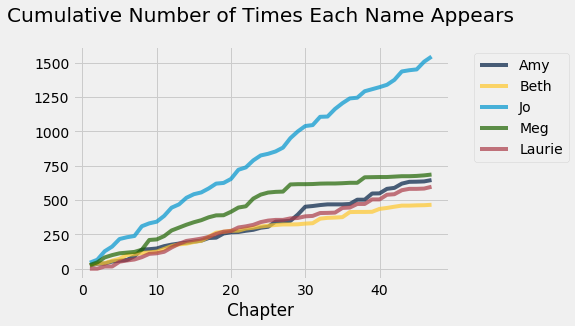

In [45]:
# Plot the cumulative counts.
cum_counts = counts.cumsum().with_column('Chapter', np.arange(1, 48, 1))
cum_counts.plot(column_for_xticks=5)
plots.title('Cumulative Number of Times Each Name Appears', y=1.08)

### Representing Text as Word Frequency
We are going to learn to create a word frequency representation of text.
First we need to import CountVectorizer (from sklearn module) for this part of the lab.
Sklearn is a Python machine learning module.  We will use it in some of the future labs
as well.

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
tweets =["Penn State football is great.", "Penn State is a great state university.", \
"Is Saturday a great game?", "Penn State football had a great game Saturday."]
print(tweets)

['Penn State football is great.', 'Penn State is a great state university.', 'Is Saturday a great game?', 'Penn State football had a great game Saturday.']


In [48]:
vectorizer = CountVectorizer()

In [49]:
WFmatrix= vectorizer.fit_transform(tweets)
print(vectorizer.get_feature_names())

['football', 'game', 'great', 'had', 'is', 'penn', 'saturday', 'state', 'university']


In [50]:
WFarray= WFmatrix.toarray()
print(WFarray)

[[1 0 1 0 1 1 0 1 0]
 [0 0 1 0 1 1 0 2 1]
 [0 1 1 0 1 0 1 0 0]
 [1 1 1 1 0 1 1 1 0]]


### Exercise 4
Create a list of 3-4 sentences/tweets that share some common words. Use CountVectorizer to create a Word Frequency representation of the sentences/tweets. Print the words (using get_feature_names() of vectorizer) of the matrix. Print the word frequency matrix.

In [51]:
mytweets=["The Philadlephia Eagles will win the Super Bowl.", "The Philadelphia Phillies cannot win anything.",  "Are the Philadelphis Sixers the best team in basketball?", "Basketball is my favorite sport."]
print(tweets)
vectorizer = CountVectorizer()
myWFmatrix = vectorizer.fit_transform(tweets)
print(vectorizer.get_feature_names())

['Penn State football is great.', 'Penn State is a great state university.', 'Is Saturday a great game?', 'Penn State football had a great game Saturday.']
['football', 'game', 'great', 'had', 'is', 'penn', 'saturday', 'state', 'university']


In [53]:
myWFarray = myWFmatrix.toarray()
print(myWFarray)

[[1 0 1 0 1 1 0 1 0]
 [0 0 1 0 1 1 0 2 1]
 [0 1 1 0 1 0 1 0 0]
 [1 1 1 1 0 1 1 1 0]]


### Representing Tweets as Word Frequency
We are going to read some actual tweets and see how they can be convered to Word Frequency representation in a similar way.

In [54]:
t1 = Table.read_table("LabelledTweets.csv", sep =',')
t1.show(5)

Text,Support
RT @kasserolees: Energy is the #1 contributer to climate ...,1
RT @edelman_barbara: @msnbc why don t you have a climate ...,1
RT @OtagoGrad: @anthonyfurey @OskieOckham The data doesn ...,0
The Dow just recorded its 3rd worst day ever. Think @rea ...,0
RT @SimonBanksHB: I am not going to rule out things base ...,0


### Sample a small number of tweets 
We first sample a small number of tweets so that the word frequency table is not too large to visualize.

In [55]:
sampled_t1 = t1.sample(4)
sampled_t1

Text,Support
28 degrees in Toronto today. It s mid October but it fee ...,0
RT @VAPolitical: Maybe Now Trump-GOP Believe in Climate ...,1
RT @nytimesworld: Scientists rang the alarm: Climate cha ...,1
And politicians should quit using miners' pain to divide ...,0


### We take the column "Text" of the sampled tweet table, then use the list function to turn it into a list.

In [56]:
sampled_list= list(sampled_t1["Text"])
print(sampled_list)

['28 degrees in Toronto today. It s mid October but it feels like July. Climate change is a hoax.', 'RT @VAPolitical: Maybe Now Trump-GOP Believe in Climate Change! Hurricane Michael Live Updates: Category 3 Storm Charges Into Georgia https', 'RT @nytimesworld: Scientists rang the alarm: Climate change can bring us into crisis by 2040. Now will world leaders take it to heart? htt', "And politicians should quit using miners' pain to divide regions of our country."]


In [57]:
count_vect = CountVectorizer()
tweet_vect = count_vect.fit_transform(sampled_list)

### Exercise 5
Display the words and the word frequency extracted from the tweets in the sampled_list, using the word frequency matrix generated by CountVectorizer and fit_transform above.

In [68]:
print(sampled_list)
vectorizer1 = CountVectorizer()
tweetWFmatrix = vectorizer1.fit_transform(sampled_list)
print(vectorizer1.get_feature_names())

['28 degrees in Toronto today. It s mid October but it feels like July. Climate change is a hoax.', 'RT @VAPolitical: Maybe Now Trump-GOP Believe in Climate Change! Hurricane Michael Live Updates: Category 3 Storm Charges Into Georgia https', 'RT @nytimesworld: Scientists rang the alarm: Climate change can bring us into crisis by 2040. Now will world leaders take it to heart? htt', "And politicians should quit using miners' pain to divide regions of our country."]
['2040', '28', 'alarm', 'and', 'believe', 'bring', 'but', 'by', 'can', 'category', 'change', 'charges', 'climate', 'country', 'crisis', 'degrees', 'divide', 'feels', 'georgia', 'gop', 'heart', 'hoax', 'htt', 'https', 'hurricane', 'in', 'into', 'is', 'it', 'july', 'leaders', 'like', 'live', 'maybe', 'michael', 'mid', 'miners', 'now', 'nytimesworld', 'october', 'of', 'our', 'pain', 'politicians', 'quit', 'rang', 'regions', 'rt', 'scientists', 'should', 'storm', 'take', 'the', 'to', 'today', 'toronto', 'trump', 'updates', 'us', 

In [66]:
tweetWFarray = myWFmatrix.toarray()
print(tweetWFarray)

[[0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 2 1 0 1 0 0 0 1
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0
  0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0]
 [1 0 1 0 0 1 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0
  0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0]]
